In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [20]:
raw_data=pd.read_csv('./survey.csv')
raw_data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [21]:
list(raw_data.columns)

['Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

In [22]:
raw_data1=raw_data.drop(['comments'], axis=1)
raw_data1.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [24]:
underwent_treatment=raw_data1[raw_data1['treatment'].str.contains("Yes")]
underwent_treatment.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
10,2014-08-27 11:32:44,31,Male,United States,OH,NaN,No,Yes,Sometimes,6-25,...,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No


In [29]:
freq_location =underwent_treatment.groupby(['Country'])['treatment'].count()
freq_location.head(150)

Country
Australia          13
Bahamas, The        1
Belgium             1
Brazil              2
Bulgaria            2
Canada             37
Croatia             2
Denmark             2
Finland             1
France              2
Germany            21
India               3
Ireland            13
Italy               1
Japan               1
Mexico              1
Moldova             1
Netherlands         9
New Zealand         5
Poland              4
Singapore           1
Slovenia            1
South Africa        4
Sweden              2
Switzerland         3
United Kingdom     93
United States     410
Zimbabwe            1
Name: treatment, dtype: int64

Text(0, 0.5, 'Count')

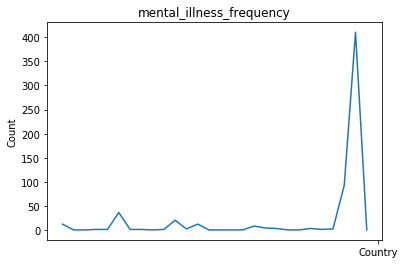

In [37]:
plt.plot(freq_location, label='country_frequency')
plat_x=['Country']
plt.title('mental_illness_frequency')
plt.xticks(['Country'],plat_x)
plt.ylabel('Count')

In [38]:
USA=raw_data1[raw_data1['Country'].str.contains("United States")][raw_data1['treatment'].str.contains("Yes")]
USA.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
10,2014-08-27 11:32:44,31,Male,United States,OH,NaN,No,Yes,Sometimes,6-25,...,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
12,2014-08-27 11:33:23,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Don't know,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes


In [41]:
by_loc =USA.groupby(['Country'])['treatment'].count()
by_loc.head(100)

Country
United States    410
Name: treatment, dtype: int64

In [15]:
COD =call_of_duty_sales.groupby('Platform')['NA_Sales'].sum().reset_index()
COD.head(20)

,Platform,NA_Sales
0,PS3,25.59
1,PS4,8.57
2,X360,52.89


Text(0, 0.5, 'sales')

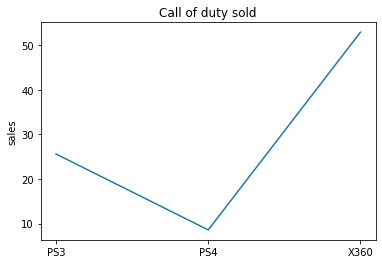

In [16]:
plt.plot(COD.NA_Sales, label='NA_Sales')
plat_x=['PS3','PS4','X360']
plt.title('Call of duty sold')
plt.xticks([0,1,2],plat_x)
plt.ylabel('sales')